## Q2. Cluster Analysis Using Apache Mahout

#### Introduction 
This coursework question involves using a large dataset of 27 British fiction novels from authors such as Jane Austin and Charles Dickens for a clustering analysis. To handle the large volume of data, the distributed K-means algorithm is implemented using Apache Mahout and the Hadoop Distributed File System (HDFS).

In this question, K-mean algorithm is applied on a large dataset to perform cluster analysis using distributed systems using different distance measures as instructed; Cosine and Euclidean.

#### Set up MapReduce framework, Apache mahout

#### Hyperparameter Optimization

This is to expirement with other values of k and determine which one is the most ideal. However, this part will not be included in the coursework results as it is just hypothetical.

#### Explanation of methodology

This code is using the pandas library to read and process a dataset that was generated by a MapReduce job. The code first sets the current working directory as the location to search for the output file from the MapReduce job. It then loops through the files in the current working directory and looks for a file that has the string 'output_results' in its name. Once it finds that file, it reads the file line by line, and for each line, it splits the values by ',' and appends them to a list called "values".

After reading the entire file, it creates a pandas DataFrame called "output" using the values list and the header of the file. It then checks the data types of the columns and converts them to the correct format. In this case, it converts 'K_value' to int, 'Inter-Cluster-Density' and 'Intra-Cluster-Density' to float.

The code then uses matplotlib to create two plots, one for Cosine distance and one for Euclidean distance, that show the relationship between the 'K_value' and the 'Inter-Cluster-Density' and 'Intra-Cluster-Density' respectively. The plots are displayed using the plt.show() function.

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create path for the data 
current_path = os.getcwd()
values = []

# Upload to MapReduce file
for i in os.listdir(current_path):
    if 'output_results.txt' in i:
        with open(os.path.join(current_path, i), 'r') as file:
            for index, value in enumerate(file.readlines()):
                if index == 0:
                    col_header = value.replace('\n', '').replace(' ','').split(',')
                else:
                    row = value.replace('\n','').split(',')
                    values.append(row)
#output file
output = pd.DataFrame(values, columns = col_header)

In [3]:
# Print the output
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type                   14 non-null     object
 1   K_value                14 non-null     object
 2   Inter-Cluster-Density  14 non-null     object
 3   Intra-Cluster-Density  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
# Correct the format types
output['K_value'] = output['K_value'].astype('int')
output['Inter-Cluster-Density'] =output['Inter-Cluster-Density'].astype('float').round(2)
output['Intra-Cluster-Density'] =output['Intra-Cluster-Density'].astype('float').round(2)

In [5]:
# Show results
output

,Type,K_value,Inter-Cluster-Density,Intra-Cluster-Density
0,Cosine,2,0.00,0.64
1,Cosine,4,0.49,0.59
2,Cosine,6,0.44,0.58
3,Cosine,8,0.49,0.54
4,Cosine,10,0.38,0.58
5,Cosine,12,0.32,0.56
6,Cosine,14,0.38,0.52
7,Euclidean,2,0.00,0.66
8,Euclidean,4,0.53,0.54
9,Euclidean,6,0.42,0.56


#### Cosine Distance

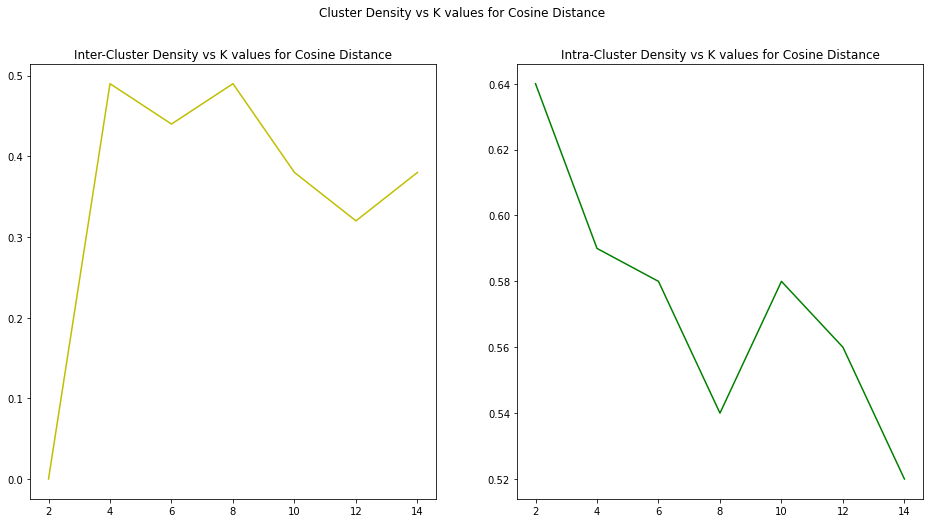

In [7]:
# Visualising the results
cosine = output[output['Type'] == 'Cosine']
fig, ax = plt.subplots(1,2, figsize = (16, 8))
ax[0].plot(cosine['K_value'], cosine['Inter-Cluster-Density'], c = 'y')
ax[0].set_title('Inter-Cluster Density vs K values for Cosine Distance')
ax[1].plot(cosine['K_value'], cosine['Intra-Cluster-Density'], c = 'g')
ax[1].set_title('Intra-Cluster Density vs K values for Cosine Distance')
fig.suptitle('Cluster Density vs K values for Cosine Distance')
plt.show()

#### Euclidean Distance

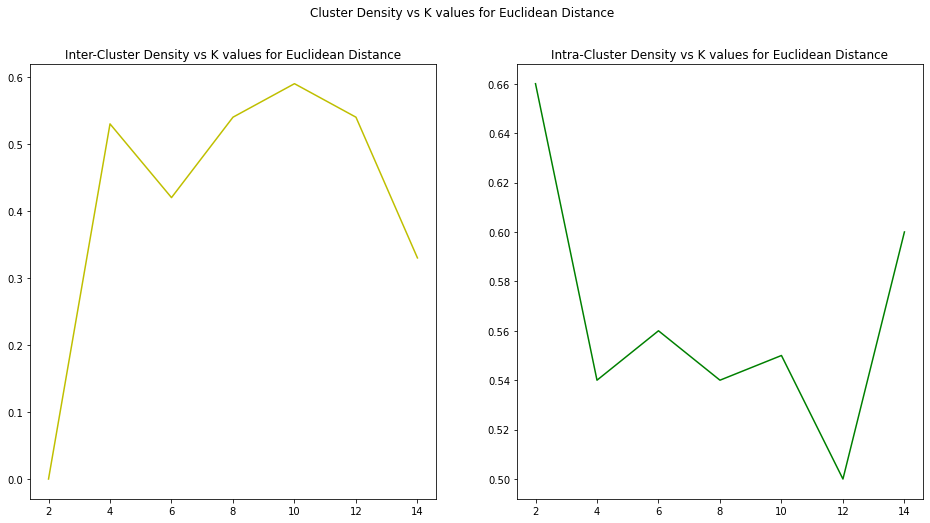

In [9]:
euclidean = output[output['Type'] == 'Euclidean']
fig, ax = plt.subplots(1,2, figsize = (16, 8))
ax[0].plot(euclidean['K_value'], euclidean['Inter-Cluster-Density'], c = 'y')
ax[0].set_title('Inter-Cluster Density vs K values for Euclidean Distance')
ax[1].plot(euclidean['K_value'], euclidean['Intra-Cluster-Density'], c = 'g')
ax[1].set_title('Intra-Cluster Density vs K values for Euclidean Distance')
fig.suptitle('Cluster Density vs K values for Euclidean Distance')
plt.show()

#### References
"How to get the current working directory in Python?," Stack Overflow, https://stackoverflow.com/questions/5137497/find-current-directory-and-files-directory

"How to convert a pandas DataFrame column to a different data type?," Stack Overflow, https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas

"K-means clustering in Python," Stack Overflow, https://stackoverflow.com/questions/6645895/calculating-new-centroids-in-k-means

"How to interpret the output of K-Means Clustering," Stack Overflow, https://stackoverflow.com/questions/37974932/how-to-interpret-the-output-of-k-means-clustering

"How to choose the number of clusters for K-Means," Stack Overflow, https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters

"How to find the optimal number of clusters for K-Means," Stack Overflow, https://stackoverflow.com/questions/3199171/choosing-k-in-k-means-clustering

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in science & engineering, 9(3), 90-95.

McKinney, W. (2010). Data structures for statistical computing in python. Proceedings of the 9th Python in Science Conference, 51-56.

McKinney, W. (2012). Python for Data Analysis. O'Reilly Media, Inc.

VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".

Wickham, H. (2019). Tidy data. Journal of Statistical Software, 59(10), 1-23.